# Question 3

    Johana Binta Vitale FAYE
    Almamy Youssouf LY
    Coumba SY

In [1]:
#importation des différentes bibliothéques
import pandas as pd #importation de la bibliothéque pandas pour le traitement des dataframe
import matplotlib.pyplot as plt # importation du module pyplot de la bibliothéque matplotlib pour la visualisation 
import numpy as np #importation de la bibliothéque numpy pour effectuer des calculs numéiques
import seaborn as sns #importation du bibliothéque seaborn, elle est basée sur matplotlib et permet de dessiner des graphes

In [4]:
smp.shape[0]

799

In [2]:
#1_Enregistrement des données
smp = pd.read_table("smp.csv", sep=";") #lecture et stockage de notre dataframe dans une variable nommée smp 
smp.shape #affiche la dimension notre datframe sous forme de tuple dont la premiére valeur représente le nbre d'observation 
#et la 2nde valeur représente le nbre de variables

(799, 26)

In [7]:
#Vérification 
print(smp.describe(include = 'all'))
"""Donc nous avons bien 799 observations et 26 variables."""

               age     prof       duree      discip    n.enfant   n.fratrie  \
count   797.000000      793  576.000000  793.000000  773.000000  799.000000   
unique         NaN        8         NaN         NaN         NaN         NaN   
top            NaN  ouvrier         NaN         NaN         NaN         NaN   
freq           NaN      227         NaN         NaN         NaN         NaN   
mean     38.899624      NaN    4.302083    0.232030    1.755498    4.286608   
std      13.280978      NaN    0.868219    0.422395    1.834044    3.441485   
min      19.000000      NaN    1.000000    0.000000    0.000000    0.000000   
25%      28.000000      NaN    4.000000    0.000000    0.000000    2.000000   
50%      37.000000      NaN    5.000000    0.000000    1.000000    3.000000   
75%      48.000000      NaN    5.000000    0.000000    3.000000    6.000000   
max      83.000000      NaN    5.000000    1.000000   13.000000   21.000000   

             ecole  separation  juge.enfant       p

'Donc nous avons bien 799 observations et 26 variables.'

In [9]:
#2_Changement du type des variables

#Type des variables avant convertion
smp.dtypes

age             float64
prof             object
duree           float64
discip          float64
n.enfant        float64
n.fratrie         int64
ecole           float64
separation      float64
juge.enfant     float64
place           float64
abus            float64
grav.cons       float64
dep.cons          int64
ago.cons          int64
ptsd.cons         int64
alc.cons          int64
subst.cons        int64
scz.cons          int64
char            float64
rs              float64
ed              float64
dr              float64
suicide.s       float64
suicide.hr      float64
suicide.past    float64
dur.interv      float64
dtype: object

In [10]:
#Changement des types

Liste_category = ["prof", "duree", "discip","ecole", "separation", "juge.enfant", "place", "abus", "grav.cons", "dep.cons",
                 "ago.cons","ptsd.cons", "alc.cons", "subst.cons", "scz.cons", "char", "rs","ed", "dr", "suicide.hr",
                  "suicide.past"]  #Liste contenant uniquement les variables à convertir en category                
for col in smp.columns:            #col parcoure les colonnes du dataframe
    for elt in Liste_category:     #j parcoure la Liste 
        if col == elt:             #condition
            smp[col] = smp[col].astype('category')  #si la condition est réalisée, on change le type en category
smp.dtypes   #affiche le type des variables aprés la conversion

age              float64
prof            category
duree           category
discip          category
n.enfant         float64
n.fratrie          int64
ecole           category
separation      category
juge.enfant     category
place           category
abus            category
grav.cons       category
dep.cons        category
ago.cons        category
ptsd.cons       category
alc.cons        category
subst.cons      category
scz.cons        category
char            category
rs              category
ed              category
dr              category
suicide.s        float64
suicide.hr      category
suicide.past    category
dur.interv       float64
dtype: object

In [105]:
#3_Calculer la moyenne, la variance et l'écart type pour les var suivantes: age, n.enfant, n.fratrie, dur.interv.
import numpy as np #importation de la bibliothéque numpy pour effectuer des calculs numériques
#définissons d'une fonction permettant de calculer les paramétres: moyenne, espérence et variance des colonnes 
def calcul_parametre(col): #prend comme la colonne dont on doit calculer les paramétres
    return (np.round(np.mean(col),2),np.round( np.var(col),2), np.round(np.std(col), 2)) #retourne les paramétres arrondis à 2 chiffres prés
resultat = smp.select_dtypes(exclude=['category']).apply (calcul_parametre,axis=0) #appelle de la fonction calcul_parametre sur l'ensemble des colonnes exceptés lescolonnes du dataframe qui sont de type catégory
resultat #affiche chaque colonne suivis des paramétres (moyenne, variance, écart-type) sous forme de tuple


age            (38.9, 176.16, 13.27)
n.enfant          (1.76, 3.36, 1.83)
n.fratrie        (4.29, 11.83, 3.44)
suicide.s         (0.79, 2.06, 1.43)
dur.interv    (61.89, 386.38, 19.66)
dtype: object

In [108]:
#Les trois premiéres quantiles de la variable age
smp["age"].describe()

count    797.000000
mean      38.899624
std       13.280978
min       19.000000
25%       28.000000
50%       37.000000
75%       48.000000
max       83.000000
Name: age, dtype: float64

In [75]:
#1iére quantile(25%): 28
#2iéme quantile(50%): 37
#3iéme quantile(75%): 48

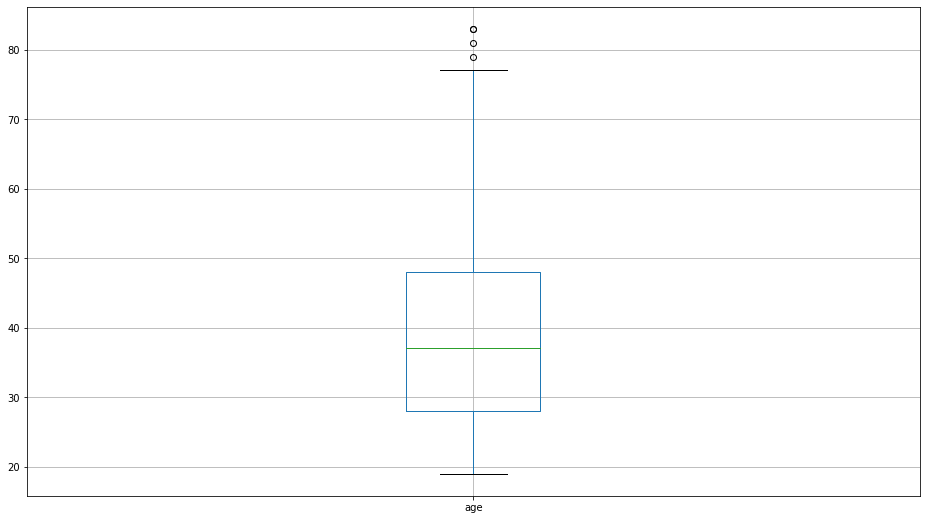

In [151]:
#4_Tracer le boxplot pour la variable age
import matplotlib.pyplot as plt # importation du module pyplot de la bibliothéque matplotlib pour la visualisation 
plt.rcParams["figure.figsize"] = [16,9] #paramétrage du fenêtre graphique utliser rcParams
#plt.boxplot(smp["age"]) 
smp.boxplot(column='age') #dessine le boxplot
plt.draw() #efface le message suivant <matplotlib.axes._subplots.AxesSubplot at 0x209d77362c8>
plt.savefig("Boxplot des ages.png", bbox_inches = "tight")# bbox = "tight" permet de bien proportionner le graphique lors de l'enregistrement

In [144]:
"""On a un boxplot qui représente la distribution des âges de cette population carcérale.
La médiane(trait en vert) est de 37 ans environ ce qui signifie que 50% des détenus sont agés de moins de 37 ans
et 50 % sont agés de plus de 37 ans. L'âge maximale est environ de 83 ans (le point le plus haut). 
L'âge minimale est de 19 ans (trait en bas)."""

"On a un boxplot qui représente la distribution des âges de cette population carcérale.\nLa médiane(trait en vert) est de 37 ans environ ce qui signifie que 50% des détenus sont agés de moins de 37 ans\net 50 % sont agés de plus de 37 ans. L'âge maximale est environ de 83 ans (le point le plus haut). \nL'âge minimale est de 19 ans (trait en bas)."

In [149]:
#5_Données des agriculteurs ayant plus de 2 enfants
smp.loc[(smp["prof"] == "agriculteur") & (smp["n.enfant"] > 2),:]

,age,prof,duree,discip,n.enfant,n.fratrie,ecole,separation,juge.enfant,place,...,subst.cons,scz.cons,char,rs,ed,dr,suicide.s,suicide.hr,suicide.past,dur.interv
14,64.0,agriculteur,NaN,0.0,3.0,2,1.0,0.0,0.0,0.0,...,0,0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,80.0
311,42.0,agriculteur,4.0,0.0,3.0,6,1.0,0.0,0.0,0.0,...,0,0,2.0,1.0,3.0,2.0,3.0,1.0,0.0,NaN
390,36.0,agriculteur,4.0,1.0,3.0,4,3.0,1.0,1.0,1.0,...,1,0,1.0,NaN,3.0,1.0,0.0,0.0,0.0,NaN
441,79.0,agriculteur,5.0,0.0,5.0,6,2.0,0.0,0.0,0.0,...,0,0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,85.0


In [150]:
#Nous avons quatre professeurs qui ont plus de deux enfants.

In [179]:
#6_Calcul des fréquences des modalités de la var profession 
frequence_profession = smp["prof"].value_counts(normalize = True) #on utilise le module value_counts pour 
#compter le nombre de valeur unique, normalize: booléen par défaut est à False, si True retourne les fréquences relatives
frequence_profession = np.round(frequence_profession,4) #arrondis
print("La fréquence des modalité de la variable profession sont:")
print(frequence_profession * 100)


La fréquence des modalité de la variable profession sont:
ouvrier               28.63
sans emploi           27.99
employe               17.02
artisan               11.35
prof.intermediaire     7.31
autre                  3.91
cadre                  3.03
agriculteur            0.76
Name: prof, dtype: float64


In [177]:
#La catégorie modale: c'est une variable qualitative nominale

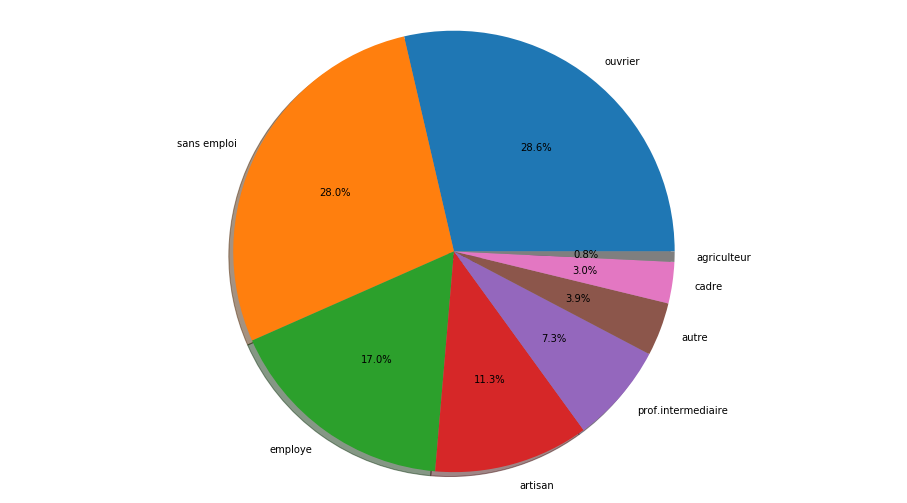

In [223]:
#7_Tracer le diagramme circulaire de la variable profession
plt.rcParams["figure.figsize"] = [16,9] #paramétrage du fenêtre graphique utliser rcParams
data = frequence_profession #affecte à data la variable frequence_profession de la question n°6
#les valeurs de data, les labels: les indexes de la série, autopct le nbre de chiffres aprés la virgule
plt.pie(data.values, labels = data.index, autopct = "%1.1f%%", shadow = True) #pie dessine un diagramme circulaire
#labels = data.index: affiche les modalités de la variable profession dans le diagramme circulaire
#autopct = "%1.1f%%": nombre chiffre aprés la virgule
#shadow = True: ajoute un contour autour du diagramme circulaire
plt.axis('equal') #définir et ajuster des tracés avec des rapports d'axe égaux 
plt.draw() #efface les messages qui accompagnent le graphe
plt.savefig("Diagramme circulaire des différentes professions.png", bbox_inches = "tight")# bbox = "tight" permet de bien proportionner le graphique lors de l'enregistrement

In [244]:
#8_moyenne des âges par profession
smp.groupby(["prof"]).agg([np.mean]) #on groupe par prof avec l'argument groupby puis on utilise la fonction agg(aggrégation) pour caculer la moyenne

,age,n.enfant,n.fratrie,suicide.s,dur.interv
,mean,mean,mean,mean,mean
prof,,,,,
agriculteur,48.833333,2.666667,3.833333,1.600000,78.750000
artisan,45.111111,2.386364,4.077778,0.517647,63.825581
autre,34.935484,1.483871,3.548387,0.500000,64.230769
cadre,50.083333,2.166667,2.791667,0.708333,56.956522
employe,38.711111,1.534351,3.940741,0.766129,62.053435
ouvrier,37.396476,1.746606,5.022026,0.895928,61.731481
prof.intermediaire,43.258621,2.107143,3.810345,0.465517,63.075472
sans emploi,35.896396,1.469484,4.283784,0.960976,61.088235


In [246]:
#9_Donner la table des effectifs pour les var prof incluant les NaN
frequence_profession = smp["prof"].value_counts(dropna = False) #on utilise le module value_counts pour
#compter le nombre de valeur unique, normalize: booléen par défaut est à False, si True retourne les fréquences relatives
frequence_profession

ouvrier               227
sans emploi           222
employe               135
artisan                90
prof.intermediaire     58
autre                  31
cadre                  24
NaN                     6
agriculteur             6
Name: prof, dtype: int64

In [252]:
#10_Donner le nombre de "Nan" pour chaque variable
print(smp)

      age                prof duree discip  n.enfant  n.fratrie ecole  \
0    31.0               autre   4.0    0.0       2.0          4   1.0   
1    49.0                 NaN   NaN    0.0       7.0          3   2.0   
2    50.0  prof.intermediaire   5.0    0.0       2.0          2   2.0   
3    47.0             ouvrier   NaN    0.0       0.0          6   1.0   
4    23.0         sans emploi   4.0    1.0       1.0          6   1.0   
..    ...                 ...   ...    ...       ...        ...   ...   
794  28.0         sans emploi   5.0    0.0       1.0          4   1.0   
795  44.0             ouvrier   4.0    1.0       1.0         12   2.0   
796  31.0               cadre   4.0    0.0       3.0          6   4.0   
797  38.0             employe   5.0    0.0       0.0          1   3.0   
798  71.0               autre   4.0    0.0       2.0          4   1.0   

    separation juge.enfant place  ... subst.cons scz.cons char   rs   ed   dr  \
0          0.0         0.0   0.0  ...     

In [258]:
print(smp.isnull().sum()) #la méthode isnull() détermine les valeurs manquantes dans chaque variable du dataframe 
#puis sum() les compte (en faisant la somme)

age               2
prof              6
duree           223
discip            6
n.enfant         26
n.fratrie         0
ecole             5
separation       11
juge.enfant       5
place             7
abus              7
grav.cons         4
dep.cons          0
ago.cons          0
ptsd.cons         0
alc.cons          0
subst.cons        0
scz.cons          0
char             96
rs              103
ed              107
dr              111
suicide.s        41
suicide.hr       39
suicide.past     14
dur.interv       50
dtype: int64


In [265]:
#11_Supprimer toutes les lignes contenant des "Nan"
smp_sansNA = smp.dropna()
smp_sansNA.isnull().sum() #vérification

age             0
prof            0
duree           0
discip          0
n.enfant        0
n.fratrie       0
ecole           0
separation      0
juge.enfant     0
place           0
abus            0
grav.cons       0
dep.cons        0
ago.cons        0
ptsd.cons       0
alc.cons        0
subst.cons      0
scz.cons        0
char            0
rs              0
ed              0
dr              0
suicide.s       0
suicide.hr      0
suicide.past    0
dur.interv      0
dtype: int64

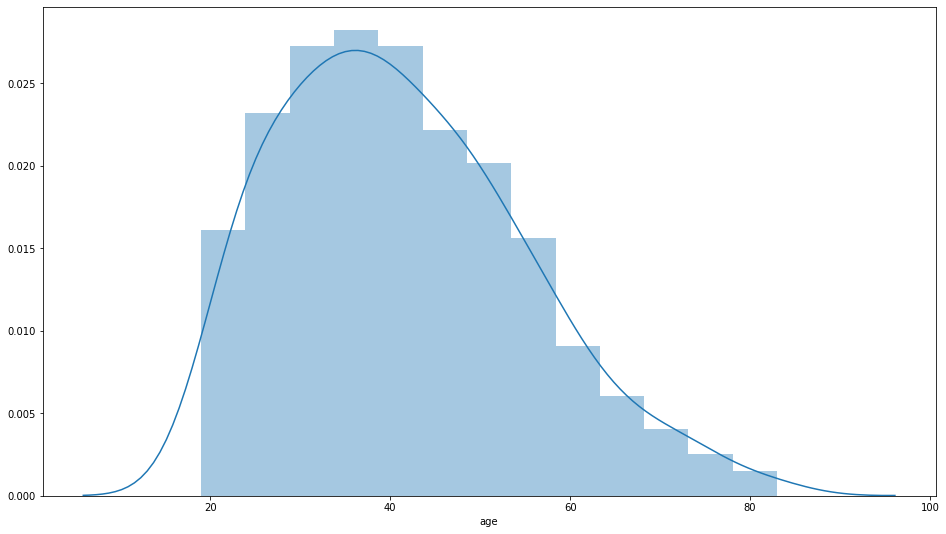

In [274]:
#12_Tracer l’histogramme et la densité de la variable age sur la même figure
import seaborn as sns #importation du bibliothéque seaborn basée sur matplotlib
plt.rcParams["figure.figsize"] = [16,9]
sns.distplot(smp_sansNA["age"]) 
plt.draw()
#on obtient un histogramme et une courbe tracée avec la méthode du kde appelée estimation par noyau. 
#Cette méthode permet d'estimer la densité de probabilité d'une variable aléatoire.
#Elle est trés utiliséee pour généraliser la méthode d'estimation d'un histogramme. 
plt.savefig("Histogramme et densité de la variable age.png", bbox_inches = "tight")# bbox = "tight" permet de bien proportionner le graphique lors de l'enregistrement

In [308]:
#13_Dicrétisation de la var aléatoire age
#q1,q2,q3 28,37,48
#agemin 19
#agemax 83
#["age1", "age2", "age3", "age4"]
smp_sansNA["age_classe"]= pd.qcut(smp.age,4) #fonction de discrétisation basée sur les quantiles 
smp_sansNA["age_classe"].value_counts() #value_counts() permet de compter le nbre de valeur dans chaque intervalle

C:\Users\ALmaMY yOUSsEf Ly\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(48.0, 83.0]      117
(37.0, 48.0]      108
(28.0, 37.0]      100
(18.999, 28.0]     78
Name: age_classe, dtype: int64

In [310]:
#14_Donnez les fréquences des modalités de la nouvelle variable age_classe
frequence_age = smp_sansNA["age_classe"].value_counts(normalize = True) #on utilise le module value_counts pour 
#unique compter le nombre valeur unique, normalize: booléen par défaut est à False, si True retourne les fréquences relatives
frequence_age = np.round(frequence_age,4) #arrondir 
print("Les fréquences des modalité de la variable age_classe sont:")
print(frequence_age * 100)

Les fréquences des modalité de la variable age_classe sont:
(48.0, 83.0]      29.03
(37.0, 48.0]      26.80
(28.0, 37.0]      24.81
(18.999, 28.0]    19.35
Name: age_classe, dtype: float64
